In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.colors as cs

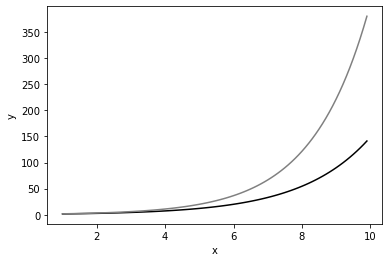

In [2]:
#create vectors

#1 to 10 with interval 0.1
x = np.arange(1,10,0.1)
y1 = np.exp(0.5*x)
y2 = np.exp(0.6*x)

#plot vectors
plt.plot(x, y1, 'k')
plt.plot(x, y2, c=[0.5,0.5,0.5])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

#### Logistic Model

In [3]:
def logistic_growth(N, t):
    #logGrowth gives the growth rate of a population of size N at time t
    r = 0.5
    K = 100
    dNdt = r*N*(1-N/K)
    return dNdt

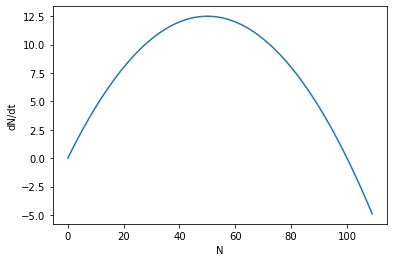

In [4]:
vN = np.arange(0,110)
plt.plot(vN, logistic_growth(vN,0))
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.show()

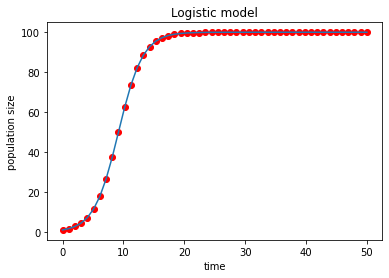

In [5]:
t0 = 0
tf = 50
N0 = 1
T = np.linspace(t0, tf)
vNint = integrate.odeint(logistic_growth, N0, T)

r = 0.5
K = 100
vNact = (N0*np.exp(r*T))/(1+N0*(np.exp(r*T)-1)/K)

plt.plot(T, vNint)
plt.scatter(T, vNact, color = 'red')
plt.xlabel('time')
plt.ylabel('population size')
plt.title('Logistic model')
plt.show()

#### Challenge Problem: Variables and Differential Equations

In [6]:
def logistic_growth_02(N, t, pars):
    #logGrowth gives the growth rate of a population of size N at time t
    #pars is a dictionary that contains parameters
    r = pars['r']
    K = pars['K']
    dNdt = r*N*(1-N/K)
    return dNdt

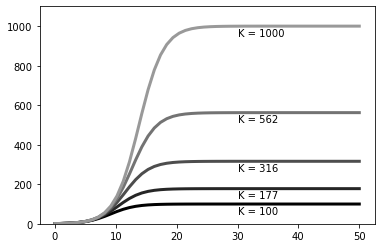

In [7]:
t0 = 0
tf = 50
N0 = 1
tVec = np.linspace(t0, tf)

pars = {}
pars['r'] = 0.5
Krange = np.logspace(2,3,num=5)

for i in range(len(Krange)):
    pars['K'] = Krange[i]
    vNint = integrate.odeint(logistic_growth_02, N0, tVec, args=(pars,))    
    
    plt.plot(tVec, vNint, color = np.array([0.75,0.75,0.75])*i/len(Krange), linewidth=3)
    plt.text(30, pars['K']-50, 'K = {K}'.format(K=int(pars['K'])),fontsize=10)
plt.ylim([0,1100])
plt.show()

#### 3 Simulating coupled ordinary differential equations

In [8]:
def proteinproduction(x, t, pars):
    #returns the instantaneous rate of change given the current time t,
    #state variable x, and parameters (pars)

    m = x[0]
    p = x[1]
    dmdt = pars['a'] - pars['bm']*m
    dpdt = pars['r']*m - pars['bp']*p
    dxdt = np.array([dmdt, dpdt])
    return (dxdt)

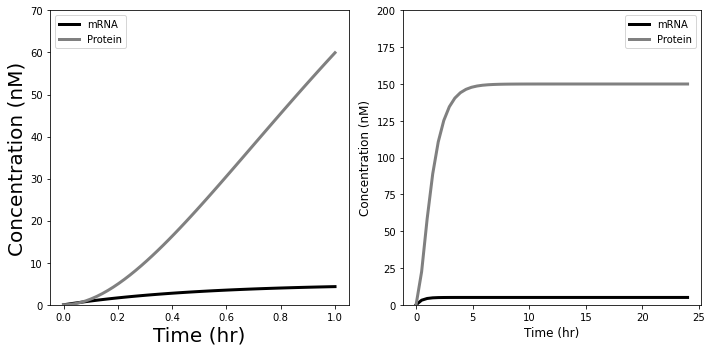

In [9]:
#structure that can be used to pass parameters into the function proteinproduction
pars = {}
pars['a'] = 10 #nm/hr
pars['bm'] = 2 #/hr
pars['bp'] = 1 # #/hr
pars['r'] = 30 #proteins/(mRNA*hr)

#initial value of x
x0 = [0,0] #m is the 1st element, p is the 2nd element
#initial time
t0 = 0
#final time
tf = 1
tf_new = 24
#points in time
t = np.linspace(t0, tf)
t_new = np.linspace(t0, tf_new)

#solution of the differential equation
x = integrate.odeint(proteinproduction, x0, t, args=(pars,))
x_new = integrate.odeint(proteinproduction, x0, t_new, args=(pars,))


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(t,x[:,0],linewidth=3,color='k')
ax[0].plot(t,x[:,1],linewidth=3,color=[0.5,0.5,0.5])
ax[0].set_xlabel('Time (hr)',fontsize=20)
ax[0].set_ylabel('Concentration (nM)',fontsize=20)
ax[0].set_ylim(0,70)

ax[1].plot(t_new,x_new[:,0],linewidth=3,color='k')
ax[1].plot(t_new,x_new[:,1],linewidth=3,color=[0.5,0.5,0.5])
ax[1].set_xlabel('Time (hr)',fontsize=12)
ax[1].set_ylabel('Concentration (nM)',fontsize=12)
ax[1].set_ylim(0,200)

ax[0].legend(['mRNA', 'Protein'], fontsize=10, loc='upper left')
ax[1].legend(['mRNA', 'Protein'], fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

#### Challenge problem: Organizing variables

In [10]:
pars = {}
pars['a'] = 10 #nm/hr
pars['bm'] = 2 #/hr
pars['bp'] = 1 # #/hr
pars['r'] = 30 #proteins/(mRNA*hr)
pars['aRange'] = np.arange(10, 52, 2)

stats = {}
stats['tvals'] = np.zeros((100, len(pars['aRange'])))
stats['mvals'] = np.zeros((100, len(pars['aRange'])))
stats['pvals']= np.zeros((100, len(pars['aRange'])))

#### Challenge problem: Visualizing Phase Space Dynamics

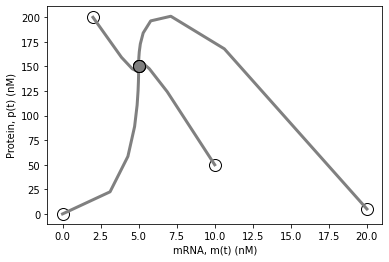

In [11]:
#initial conditions
dict_init_conditions = {'m':[0, 20, 2, 10], 'p':[0, 5, 200, 50]}

t0 = 0
tf_new = 24
t_new = np.linspace(t0, tf_new)

for i in range(len(dict_init_conditions['m'])):
    x_init = [dict_init_conditions['m'][i], dict_init_conditions['p'][i]]
    #plot initial conditions
    plt.plot(x_init[0], x_init[1], marker='o', markersize=12,  markeredgecolor='k', markerfacecolor = 'w')
    x = integrate.odeint(proteinproduction, x_init, t_new, args=(pars,))
    #plot solution of differential equation
    plt.plot(x[:,0], x[:,1], color=[0.5,0.5,0.5],linewidth=3)
    
    #fixed point
    #This fixed point occurs when dm/dt = 0 and dp/dt = 0
    #This is satisfied when m∗ = a/bm and p∗ = rm∗/bp
    m_fp = pars['a']/pars['bm']
    p_fp = pars['r']*m_fp/pars['bp']
    
    #plot fixed point
    plt.plot(m_fp, p_fp, marker='o', markersize=12, markeredgecolor='k')

    plt.xlabel('mRNA, m(t) (nM)',fontsize=10)
    plt.ylabel('Protein, p(t) (nM)',fontsize=10)

plt.show()

#### 3.1.2 Nullclines

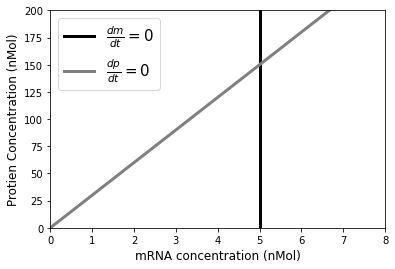

In [12]:
m_nullcline = pars['a']/pars['bm']
p_nullcline = lambda p: pars['bp']/pars['r'] * p #an anonymous function

pvec = np.arange(0,201,20)
mvec = np.arange(0,9)

plt.plot(m_nullcline*np.ones(np.shape(pvec)), pvec, linewidth=3, color = 'k')
plt.plot(p_nullcline(pvec), pvec, linewidth=3, color = 'gray')

plt.legend([r'$\frac{dm}{dt} = 0$',r'$\frac{dp}{dt} = 0$'],fontsize=15)
plt.xlim(min(mvec),max(mvec))
plt.ylim(min(pvec),max(pvec))
plt.xlabel('mRNA concentration (nMol)',fontsize=12)
plt.ylabel('Protien Concentration (nMol)',fontsize=12)

plt.show()

The nullclines cross at precisely one location. At this location both dm/dt = 0 and dp/dt = 0. Hence, the intersection of the lines is the equilibrium of the system (m∗, p∗).To visualize the expected local dynamics, it is possible to visualize dm/dt and dp/dt throughout phase space

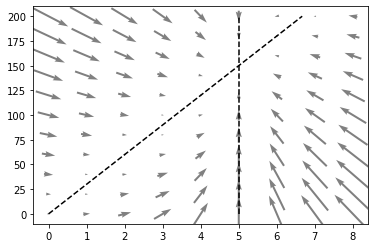

In [13]:
#define rate of change
dmdt = lambda pars, m: pars['a'] - pars['bm']*m
dpdt = lambda pars, m, p: pars['r']*m - pars['bp']*p  
[MM,PP] = np.meshgrid(mvec,pvec)

#replot the nullclines
plt.plot(m_nullcline*np.ones(np.shape(pvec)),pvec, color = 'k', linestyle = 'dashed')
plt.plot(p_nullcline(pvec),pvec, color = 'k', linestyle = 'dashed')

#overlay the arrows
plt.quiver(MM,PP,dmdt(pars,MM),dpdt(pars,MM,PP),pivot='mid', angles='xy', color = 'gray')

plt.show()

The ‘velocity field’ depicts the local direction and magnitude of flow

#### Challenge Problem: Connecting Dynamics to Nullclines

##### 0.5 hr period

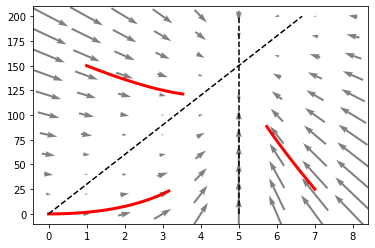

In [14]:
dict_init_conditions = {'m':[0, 7, 1], 'p':[0, 25, 150]}
t0 = 0
tf = 0.5
t_new = np.linspace(t0, tf)

for i in range(len(dict_init_conditions['m'])):
    x_init = [dict_init_conditions['m'][i], dict_init_conditions['p'][i]]
    x = integrate.odeint(proteinproduction, x_init, t_new, args=(pars,))
    #plot solution of differential equation
    plt.plot(x[:,0],x[:,1],color = 'r', linewidth=3)

#plot the nullclines
plt.plot(m_nullcline*np.ones(np.shape(pvec)),pvec, color = 'k', linestyle = 'dashed')
plt.plot(p_nullcline(pvec),pvec, color = 'k', linestyle = 'dashed')

#add the arrows
plt.quiver(MM,PP,dmdt(pars,MM),dpdt(pars,MM,PP),pivot='mid', angles='xy', color = 'gray')

plt.show()

24 hr period

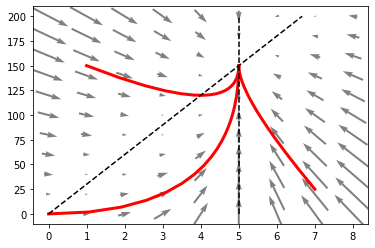

In [15]:
dict_init_conditions = {'m':[0, 7, 1], 'p':[0, 25, 150]}
t0 = 0
tf = 24
t_new = np.linspace(t0, tf, 200)

for i in range(len(dict_init_conditions['m'])):
    x_init = [dict_init_conditions['m'][i], dict_init_conditions['p'][i]]
    x = integrate.odeint(proteinproduction, x_init, t_new, args=(pars,))
    plt.plot(x[:,0],x[:,1],color = 'r', linewidth=3)

#plot the nullclines
plt.plot(m_nullcline*np.ones(np.shape(pvec)),pvec, color = 'k', linestyle = 'dashed')
plt.plot(p_nullcline(pvec),pvec, color = 'k', linestyle = 'dashed')

#add the arrows
plt.quiver(MM,PP,dmdt(pars,MM),dpdt(pars,MM,PP),pivot='mid', angles='xy', color = 'gray')

plt.show()

#### 3.2 Evaluate the local stability of equilibria

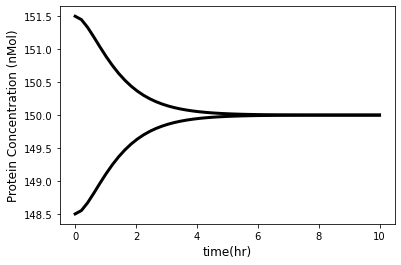

In [16]:
#find fixed points
m_fp = pars['a']/pars['bm']
p_fp = pars['r']*m_fp/pars['bp']

#perturb initial conditions
p_perturb = p_fp*0.01
m_perturb = m_fp*0.01

#perturbed the system 1% above the equilibria
x0_above = [m_fp + m_perturb, p_fp + p_perturb]
#perturbed the system 1% below the equilibria
x0_below = [m_fp - m_perturb, p_fp - p_perturb]

t0=0
tf=10
t=np.linspace(t0,tf)

#simulate and visualize just the proteins
x_above = integrate.odeint(proteinproduction, x0_above, t, args=(pars,))
x_below = integrate.odeint(proteinproduction, x0_below, t, args=(pars,))

plt.plot(t, x_above[:,1], linewidth=3, color = 'k')
plt.plot(t, x_below[:,1], linewidth=3, color = 'k')
plt.xlabel('time(hr)', fontsize = 12)
plt.ylabel('Protein Concentration (nMol)', fontsize = 12)

plt.show()

#### 4 Viral Invasion Dynamics of Bacterial Populations

#### 4.3 Goal 1: Simulate a viral invasion - NV lytic model

In [17]:
def NV_lytic(x, t, pars):
    s = x[0]
    v = x[1]
    dsdt = pars['r']*s*(1-(s/pars['K'])) - pars['phi']*s*v - pars['d']*s
    dvdt = pars['beta']*pars['phi']*s*v - pars['phi']*s*v - pars['m']*v
    dxdt = np.array([dsdt, dvdt])
    return (dxdt)

1. Starting with the ‘NV’ model, initiate an ‘inoculation’, adding N0 = 10^4/ml of bacteria, and then letting the population reach its equilibrium after approximately 24 hrs.

The equation that was used (equation 16 in the pdf) is the following:

(eq 1) dS/dt = rS (1 − S/K) − φSV − dS 

(eq 2) dV/dt = βφSV − φSV − mV

The three terms of (eq 1) describe the logistic growth, infection, and cell washout, respectively.
The three terms of (eq 2) describe the lysis, infection, and viral decay, respectively.

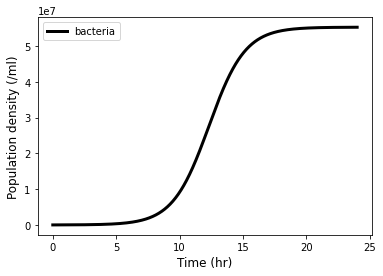

In [18]:
#parameters
pars = {}
pars['r'] = 0.95 #/hr
pars['K'] = 7.5*(10**7) #/mL
pars['phi'] = 6.7*(10**-10) #mL/hr
pars['d'] = 1/4 #/hr
pars['m'] = 1/24 #/hr
pars['beta'] = 50

x0 = [10**4,0] #s is the 1st element, v is the 2nd element
t0 = 0
tf = 24
t = np.linspace(t0, tf, 1000)

x = integrate.odeint(NV_lytic, x0, t, args=(pars,))

disease_free_equi = x[-1][0]

plt.plot(t,x[:,0],linewidth=3,color='k')
plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density (/ml)',fontsize=12)

plt.legend(['bacteria'], fontsize=10, loc='upper left')
plt.show()

In [19]:
#print population density of bacteria at time = 24
print(disease_free_equi)

55247722.33763576


In [20]:
#S* = K(r-d)/r, when V = 0
(7.5*(10**7) * (0.95 - (1/4)))/(0.95)

55263157.89473684

It reached a population density of about 5.5x10^7 as shown in the plot above. 

This is what we expect from theory - after solving for S* in (eq 1) when V = 0 (S*, 0), then S* = K(r-d)/r ~ 5.5x10^7 which agrees with the population density plot shown above.

2. Beginning from the disease-free equilibrium, add V0 = 100/ml

At Time = 24

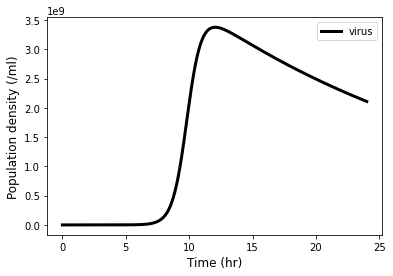

In [21]:
x0 = [disease_free_equi,100] #s is the 1st element, v is the 2nd element
t0 = 0
tf = 24
t = np.linspace(t0, tf, 1000)

x = integrate.odeint(NV_lytic, x0, t, args=(pars,))
plt.plot(t,x[:,-1],linewidth=3,color='k')
plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density (/ml)',fontsize=12)

plt.legend(['virus'], fontsize=10, loc='upper right')
plt.show()

At Time = 300

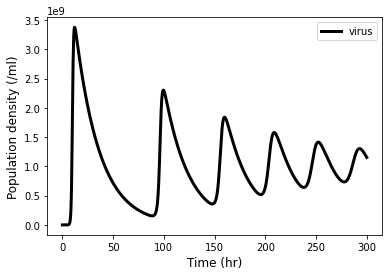

In [22]:
x0 = [disease_free_equi,100] #s is the 1st element, v is the 2nd element
t0 = 0
tf = 300
t = np.linspace(t0, tf, 1000)

x = integrate.odeint(NV_lytic, x0, t, args=(pars,))
plt.plot(t,x[:,-1],linewidth=3,color='k')
plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density (/ml)',fontsize=12)

plt.legend(['virus'], fontsize=10, loc='upper right')
plt.show()

The basic reproduction number is greater than 1. The viruses increase in abundance, at Time  = 10, but as we increase Time to 300, we see an interesting pattern where it increases, then decreases, as shown above.

3. Plot the dynamics in the phase plane and evaluate whether the system converges to a new coexistence equilibrium

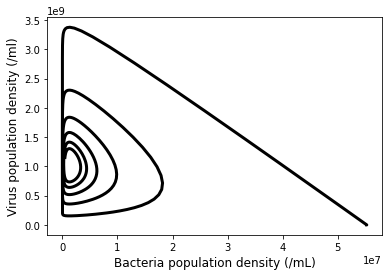

In [23]:
#plot solution of differential equation
plt.plot(x[:,0], x[:,1], color='k',linewidth=3)
plt.xlabel('Bacteria population density (/mL)',fontsize=12)
plt.ylabel('Virus population density (/ml)',fontsize=12)

plt.show()

Solving for S* and V*, we have the following equations:

S* = m/φ(β - 1) 

V* = r/φ * ( 1 - m/(Kφ(β - 1)) - d/φ

In [24]:
#Solving for S*
print(pars['m'] / (pars['phi']*(pars['beta'] - 1)))

1269164.3821707785


In [25]:
#Solving for V*
print(pars['r']/pars['phi'] * (1 - (pars['m']/(pars['K']*pars['phi']*(pars['beta'] - 1)))) - (pars['d']/pars['phi']))

1020781966.9042339


The plot above shows that the dynamics of bacteria and virus approach towards the fixed point

#### 4.4 Goal 2: Simulate a viral invasion - NIV lytic model


In [26]:
def NIV_lytic(x, t, pars):
    s = x[0]
    i = x[1]
    v = x[2]
    dsdt = pars['r']*s*(1-(s/pars['K'])) - pars['phi']*s*v - pars['d']*s
    didt = pars['phi']*s*v - pars['eta']*i - pars['dprime']*i
    dvdt = pars['beta']*pars['eta']*i - pars['phi']*s*v - pars['m']*v
    dxdt = np.array([dsdt, didt, dvdt])
    return (dxdt)

0. Starting with the ‘NIV’ model, initiate an ‘inoculation’, adding N0 = 10^4/ml of bacteria, and then
letting the population reach its equilibrium after approximately 24 hrs.

The equation that was used (equation 15 in the pdf) is the following:

(eq 1) dS/dt = rS (1 − S/K) − φSV − dS 

(eq 2) dI/dt = φSV - ηI - d'I

(eq 3) dV/dt = βηI − φSV − mV

The three terms of (eq 1) describe the logistic growth, infection, and cell washout, respectively.
The three terms of (eq 2) describe the infection, lysis, and cell washout, respectively.
The three terms of (eq 3) describe the lysis, infection, and viral decay, respectively.

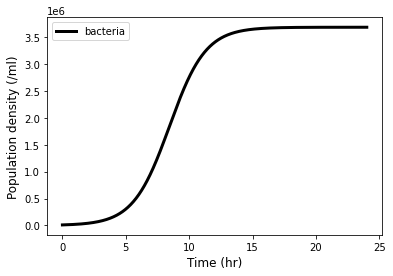

In [27]:
#parameters
pars['r'] = 0.95 #/hr
pars['K'] = 5*(10**6) #/mL
pars['phi'] = 6.7*(10**-10) #mL/hr
pars['d'] = 1/4 #/hr
pars['m'] = 1/24 #/hr
pars['eta'] = 0.5 #/hr
pars['dprime'] = 1/4 #/hr
pars['beta'] = 50

x0 = [10**4,0, 0] #s is the 1st element, i is the 2nd element, v is the 3rd element
t0 = 0
tf = 24
t = np.linspace(t0, tf, 1000)

x = integrate.odeint(NIV_lytic, x0, t, args=(pars,))

disease_free_equi = x[-1][0]

plt.plot(t,x[:,0],linewidth=3,color='k')
plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density (/ml)',fontsize=12)

plt.legend(['bacteria'], fontsize=10, loc='upper left')
plt.show()

Beginning from the disease-free equilibrium, add V0 = 100/ml and using β = 50 for the burst size and
eta = 0.5 /hr for the latent rate

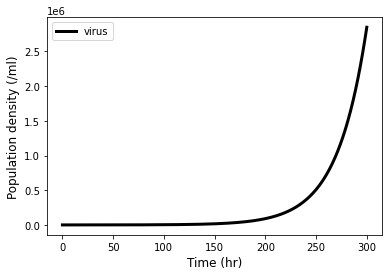

In [28]:
x0 = [disease_free_equi, 0, 100] #s is the 1st element, i is the 2nd element, v is the 3rd element
t0 = 0
tf = 300
t = np.linspace(t0, tf, 1000)

x = integrate.odeint(NIV_lytic, x0, t, args=(pars,))
plt.plot(t, x[:,2], linewidth=3,color='k')
plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density (/ml)',fontsize=12)

plt.legend(['virus'], fontsize=10, loc='upper left')
plt.show()

The basic reproduction number is greater than 1. The viruses increases in abundance.

β: 10
Pop. density at Time = 300:  0.029099212451990437
β: 20
Pop. density at Time = 300:  3.810098650672846
β: 30
Pop. density at Time = 300:  409.8737325358547
β: 40
Pop. density at Time = 300:  37029.848328686814
β: 50
Pop. density at Time = 300:  2847651.7831882224
β: 60
Pop. density at Time = 300:  150661266.5036164
β: 70
Pop. density at Time = 300:  652372119.7063837
β: 80
Pop. density at Time = 300:  707730799.4501437
β: 90
Pop. density at Time = 300:  745857989.4196843
β: 100
Pop. density at Time = 300:  776217095.6148986


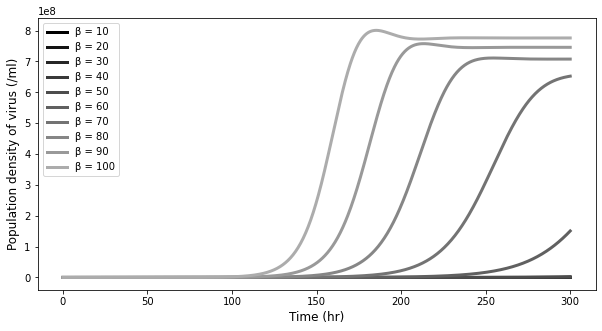

In [29]:
x0 = [disease_free_equi, 0, 100] 
t0 = 0
tf = 300
tVec = np.linspace(t0, tf, 1000)

#parameters
pars = {}
pars['r'] = 0.95 #/hr
pars['K'] = 5*(10**6) #/mL
pars['phi'] = 6.7*(10**-10) #mL/hr
pars['d'] = 1/4 #/hr
pars['m'] = 1/24 #/hr
pars['eta'] = 0.5 #/hr
pars['dprime'] = 1/4 #/hr

beta_range = np.arange(10, 110, 10)

plt.figure(figsize=(10,5))
for i in range(len(beta_range)):
    pars['beta'] = beta_range[i]
    x = integrate.odeint(NIV_lytic, x0, tVec, args=(pars,))   
    print('β: {}'.format(beta_range[i]))
    print('Pop. density at Time = 300: ', x[-1][-1])
    plt.plot(tVec, x[:,-1], color = np.array([0.75,0.75,0.75])*i/len(beta_range), linewidth=3, label='β = {beta}'.format(beta=int(pars['beta'])))

plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density of virus (/ml)',fontsize=12)
plt.legend()

plt.show()

The plot for lower values of beta (beta < 50) is not very evident in the plot above. But if we take a look at the last value of x at Time = 300 above, the population density of the virus is below 100 for beta with values 10 and 20. Thus the virus does not always invade. The decline of the population density of the virus for smaller values of beta is shown below.

β: 10
Pop. density at Time = 300:  0.029099212451990437
β: 20
Pop. density at Time = 300:  3.810098650672846
β: 30
Pop. density at Time = 300:  409.8737325358547


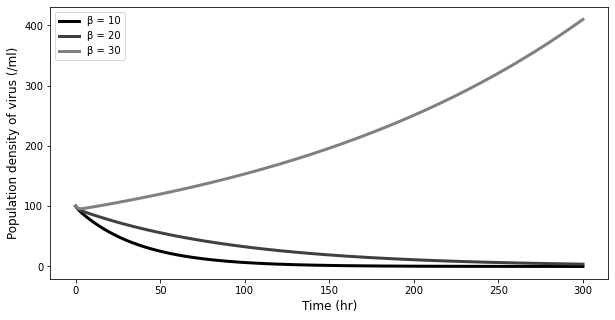

In [30]:
x0 = [disease_free_equi, 0, 100] 
t0 = 0
tf = 300
tVec = np.linspace(t0, tf, 1000)

#parameters
pars = {}
pars['r'] = 0.95 #/hr
pars['K'] = 5*(10**6) #/mL
pars['phi'] = 6.7*(10**-10) #mL/hr
pars['d'] = 1/4 #/hr
pars['m'] = 1/24 #/hr
pars['eta'] = 0.5 #/hr
pars['dprime'] = 1/4 #/hr

beta_range = np.arange(10, 40, 10)

plt.figure(figsize=(10,5))
for i in range(len(beta_range)):
    pars['beta'] = beta_range[i]
    x = integrate.odeint(NIV_lytic, x0, tVec, args=(pars,))   
    print('β: {}'.format(beta_range[i]))
    print('Pop. density at Time = 300: ', x[-1][-1])
    plt.plot(tVec, x[:,-1], color = np.array([0.75,0.75,0.75])*i/len(beta_range), linewidth=3, label='β = {beta}'.format(beta=int(pars['beta'])))

plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density of virus (/ml)',fontsize=12)
plt.legend()

plt.show()

3. Returning to the burst size of 50, consider what happens if the viral lysis rate η decreases from 1 to 0.2 /hr

η: 1.0
Pop. density at Time = 200:  2376596.5752463015
η: 0.8
Pop. density at Time = 200:  905420.3641469561
η: 0.6
Pop. density at Time = 200:  229852.11623201118
η: 0.3999999999999999
Pop. density at Time = 200:  27613.060537641828
η: 0.2
Pop. density at Time = 200:  607.7664857674271


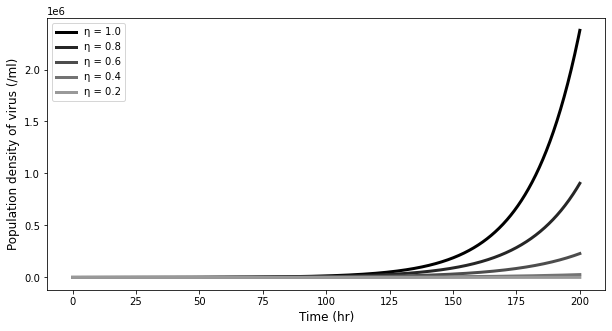

In [31]:
x0 = [disease_free_equi, 0, 100] 
t0 = 0
tf = 200
tVec = np.linspace(t0, tf, 1000)

#parameters
pars = {}
pars['r'] = 0.95 #/hr
pars['K'] = 5*(10**6) #/mL
pars['phi'] = 6.7*(10**-10) #mL/hr
pars['d'] = 1/4 #/hr
pars['m'] = 1/24 #/hr
pars['dprime'] = 1/4 #/hr
pars['beta'] = 50
eta_range = np.linspace(1, 0.2, 5)

plt.figure(figsize=(10,5))
for i in range(len(eta_range)):
    pars['eta'] = eta_range[i]
    x = integrate.odeint(NIV_lytic, x0, tVec, args=(pars,))   
    print('η: {}'.format(eta_range[i]))
    print('Pop. density at Time = 200: ', x[-1][-1])
    plt.plot(tVec, x[:,-1], color = np.array([0.75,0.75,0.75])*i/len(eta_range), linewidth=3, label='η = {eta}'.format(eta=round(float(pars['eta']),2)))

plt.xlabel('Time (hr)',fontsize=12)
plt.ylabel('Population density of virus (/ml)',fontsize=12)
plt.legend()

plt.show()

The plot above shows an increase of the population density of the virus as the value of η increases. The virus always invade since it is greater than its initial population of V_0 = 100/mL.

4. Plot the dynamics in the phase plane (N − V ) and evaluate whether the system converges to a new coexistence equilibrium

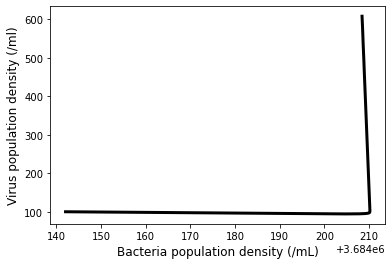

In [32]:
#plot solution of differential equation
plt.plot(x[:,0], x[:,2], color='k',linewidth=3)
plt.xlabel('Bacteria population density (/mL)',fontsize=12)
plt.ylabel('Virus population density (/ml)',fontsize=12)

plt.show()

#### Goal 3: Connect ecological conditions to invasibility of viruses

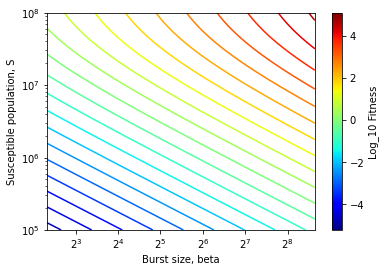

In [33]:
#parameters
r = 0.95 #/hr
K = 7.5*(10**7) #/mL
phi = 6.7*(10**-10) #
eta = 0.5
dprime = 1/4
m = 1/24

beta = np.linspace(5, 400, 10**4)
S_star = np.linspace(10**5, 10**8, 10**4)

beta_, s_star = np.meshgrid(beta, S_star)

r_hor = beta_ * ((phi*s_star)/(phi*s_star + m)) * (eta / (eta + dprime))

fig, ax = plt.subplots(1,1)
contour_plot = ax.contour(beta_, s_star, np.log(r_hor), levels = 20, cmap = 'jet')
colorbar_ = plt.cm.ScalarMappable(cmap='jet', norm = cs.Normalize(vmin=np.log(r_hor.min()), vmax=np.log(r_hor.max())))
cbar = fig.colorbar(colorbar_)

plt.yscale('log')
plt.xscale('log', base=2)

plt.ylabel("Susceptible population, S")
plt.xlabel("Burst size, beta")
cbar.set_label('Log_10 Fitness')

plt.show()

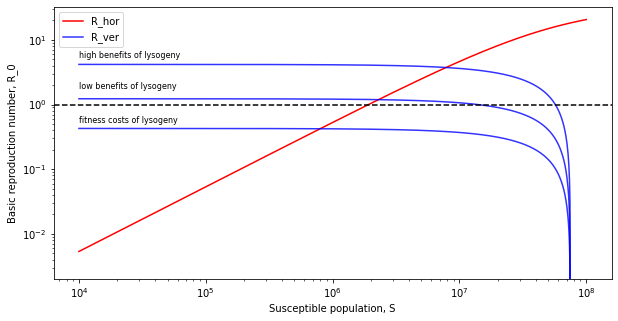

In [34]:
#parameters
K = 7.5*(10**7)
phi = 6.7*(10**-10)
eta = 0.5
dprime = 1/4
m = 1/24
beta = 50
dprime_list = [0.75, 0.44, 0.24]
bprime_list = [0.32, 0.54, 1]
S = np.logspace(4,8,1000)

#r_hor
r_hor = beta * ((phi*S)/(phi*S + m)) * (eta / (eta + dprime))
#r_ver
rver_list = []
for i,(dprime_,bprime_) in enumerate(zip(dprime_list, bprime_list)):
    r_ver = (bprime_ * (1-S/K))/dprime_
    rver_list.append(r_ver)
    
plt.figure(figsize=(10,5))
plt.loglog(S, r_hor, label = 'R_hor', color = 'r')
plt.loglog(S, rver_list[0], color = 'b', label='R_ver', alpha = 0.8)
plt.loglog(S, rver_list[1], color = 'b', alpha = 0.8)
plt.loglog(S, rver_list[2], color = 'b', alpha = 0.8)
plt.axhline(1, color = 'k', linestyle='dashed')
plt.text(10**4, rver_list[2][0]+1, 'high benefits of lysogeny', fontsize=8)
plt.text(10**4, rver_list[1][0]+0.5, 'low benefits of lysogeny', fontsize=8)
plt.text(10**4, rver_list[0][0]+0.1, 'fitness costs of lysogeny', fontsize=8)

plt.xlabel("Susceptible population, S")
plt.ylabel("Basic reproduction number, R_0")

plt.legend()
plt.show()
